# Final Project 

# The Correlation of Greenhouse Gases with Climate Forcing: Sea Surface Temperature and Sea Ice Extent on the Global Scale

In this project, I study the relationship between the rise in the global greenhouse gas (GHG) concentration with other climate change indicators, particularly the Sea Surface Temperature (SST) and the Sea Ice Extent. The motivation for doing this project was primarily my interest in how the climate behaves with the long-term increase in GHG concentration on a global scale.

 First, I import pandas, xarray, and other Python libraries.

In [4]:
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('retina')
%matplotlib inline

## Part 1: The Global Greenhouse Gases Emissions

#### Reformat the data file 

I paste the url from the epa.gov website to download "The Global GHG Emission by Gas" dataset. Then, I read the csv file into pandas and reformat it with an index 'Year'.

In [14]:
url1 = 'https://www.epa.gov/sites/production/files/2016-08/global-ghg-emissions_fig-1.csv'
emission_gases1 = pd.read_csv(url1, header = None, skiprows =[0, 1, 2, 3, 4, 5, 6],
                             names=["Year", "Carbon Dioxide", "Methane", "Nitrous oxide", "HFCs, PFCs, and SF6"])
df1 = pd.DataFrame(emission_gases1)
df1 = df1.set_index('Year')
df1

,Carbon Dioxide,Methane,Nitrous oxide,"HFCs, PFCs, and SF6"
Year,,,,
1990,24323.76461,6268.472032,3240.670950,262.076768
1995,25344.56550,6205.020413,3192.851016,290.853735
2000,27349.10122,6324.364859,3143.297834,428.806013
2005,31949.48761,6815.830655,3366.647148,598.233123
2010,34475.63575,7195.561915,3519.556289,672.133564


Similar to the first dataset, I reformat the csv file "The Global GHG Emission by Sector" dataset with the same index 'Year'

In [17]:
url2 = 'https://www.epa.gov/sites/production/files/2016-08/global-ghg-emissions_fig-2.csv'
emission_gases2 = pd.read_csv(url2, header = None, skiprows =[0, 1, 2, 3, 4, 5, 6],
                             names=["Year","Energy", "International Transport", "Argriculture", "Industrial processes", "Waste", "Land-use change and forestry"])
df2 = pd.DataFrame(emission_gases2)
df2 = df2.set_index('Year')
df2

,Energy,International Transport,Argriculture,Industrial processes,Waste,Land-use change and forestry
Year,,,,,,
1990,22984.82102,618.69,5621.789900,1125.629523,1148.256669,2595.79721
1995,23726.80578,709.22,5501.831340,1299.907596,1226.137275,2569.36870
2000,25615.00732,836.44,5423.769715,1480.669957,1299.417512,2590.18542
2005,29537.69391,973.43,5798.450564,1981.660095,1378.810375,3060.22361
2010,32677.83564,1096.40,5998.801407,2521.798570,1471.362711,2096.76915


#### Plot the Global Greenhouse Gases Emissions

I use the plotting built-in in the pandas DataFrames to plot the stacked bar graphs for two Global GHG Emissions dataset above. 

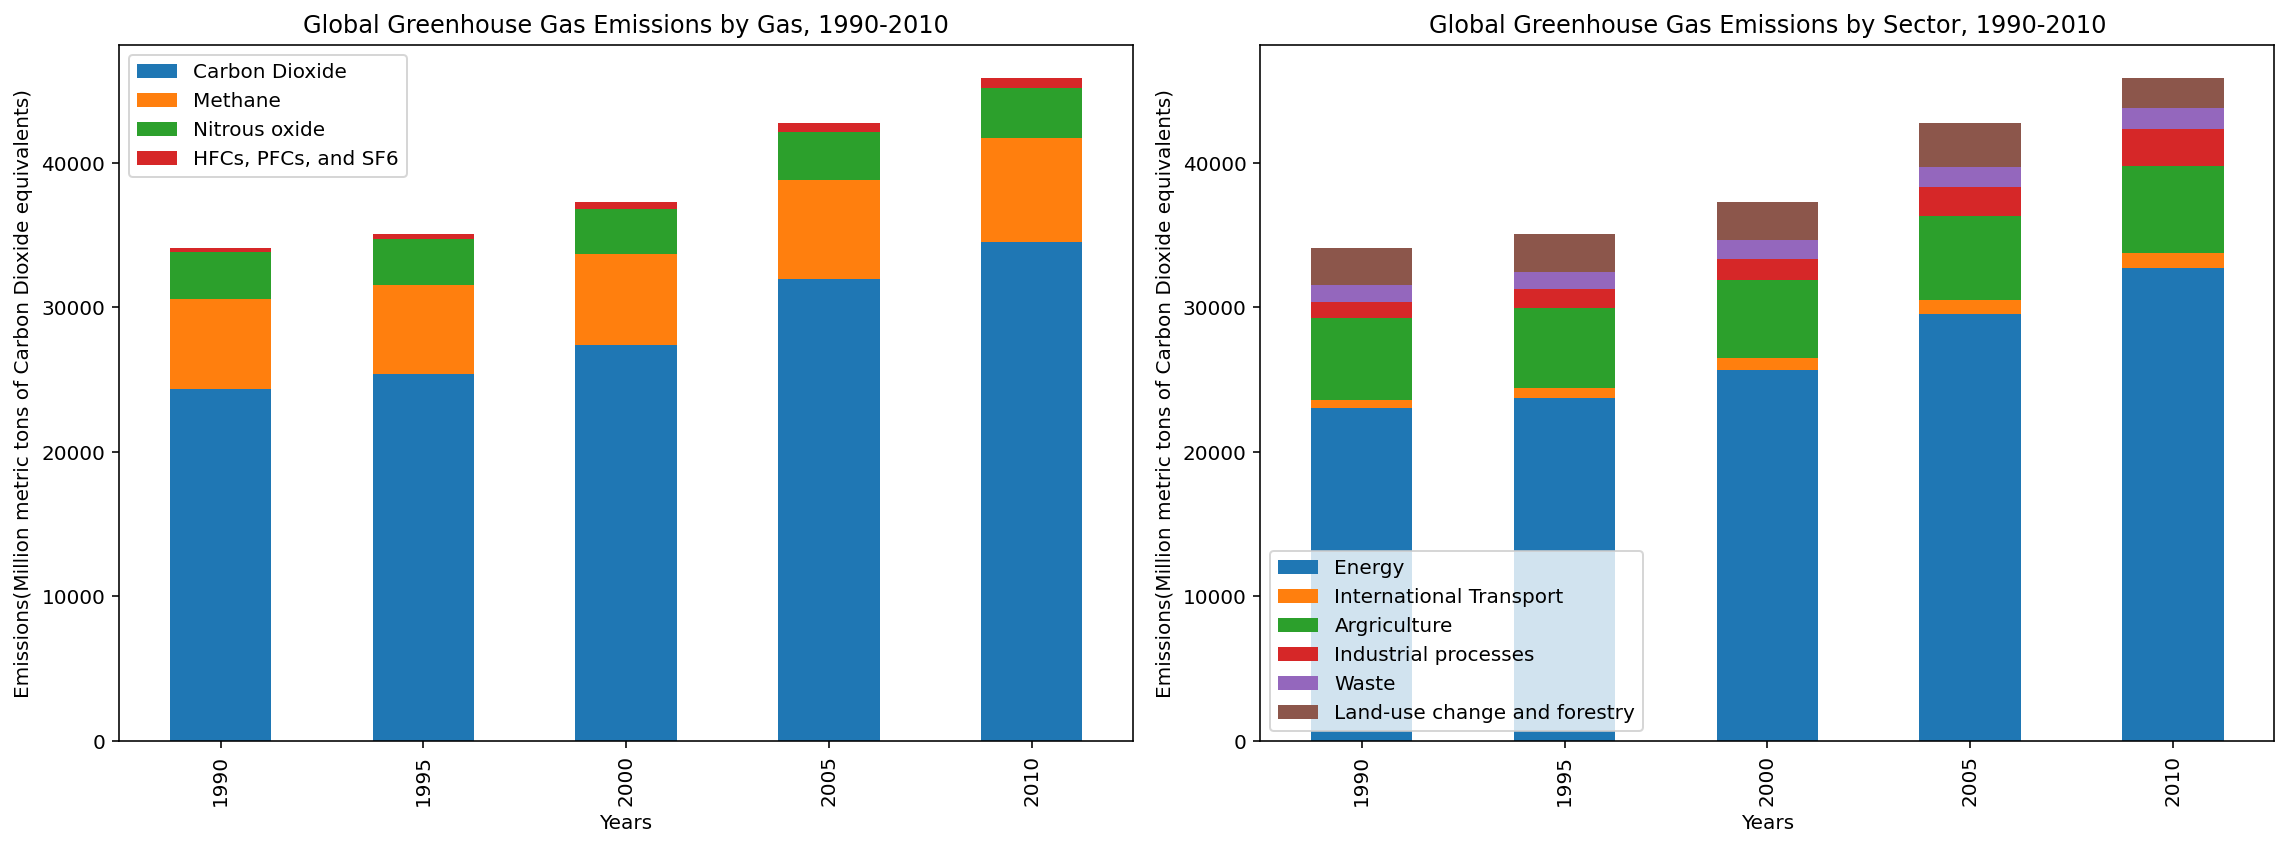

In [16]:
# Plot the 2 datasets: Emissions by gases and by sectors 

fig, axes = plt.subplots(figsize = (16,6), ncols=2)

df1.plot(ax=axes[0], kind='bar',stacked = True,xlabel = 'Years', ylabel = 'Emissions(Million metric tons of Carbon Dioxide equivalents)',
         title = 'Global Greenhouse Gas Emissions by Gas, 1990-2010')

df2.plot(ax=axes[1],kind='bar',stacked = True, xlabel = 'Years', ylabel = 'Emissions(Million metric tons of Carbon Dioxide equivalents)',
         title = 'Global Greenhouse Gas Emissions by Sector, 1990-2010')
plt.legend(loc = 'lower left')

plt.tight_layout()
plt.show()

#### Interpretation from the graphs:
In the 1990-2010 period,
- The greenhouse gas emission increases by about 11,770 million metric tons of CO2 equivalents.
- Carbon dioxide is the most contribution to greenhouse gas in global emissions. The second dominant greenhouse gas is methane.
- The energy sector is the most contribution to global greenhouse gas emissions. Note that: the energy sector includes all transportation activities except international transport (aviation and marine) (Sourced from epa.gov website).

## Part 2: The Global Annual Mean Concentration and Growth Rates of Greenhouse Gases

I download all datasets of Global Annual Mean Concentration and Growth Rates of CO2, CH4, N2O, and SF6 from the esrl.noaa.gov website and upload them in the local repository (the data is also available on my github).

#### Load, reformat, and merge the annual mean and growth rates of Methane, 1984 - 2019

I read the two text files of CH4 into pandas and reformat them with an index 'Year'. Then, I join the annual mean and growth rates datasets together.

In [20]:
# Load the annual mean and growth rates of CH4
ch4_an = pd.read_csv('ch4_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_CH4', 'Unc_CH4'])
ch4_an = ch4_an.set_index('Year')
ch4_gr = pd.read_csv('ch4_gr_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
ch4_gr = ch4_gr.set_index('Year')

# Merge two datasets 
ch4_data = ch4_an.join(ch4_gr, how ='right')
ch4_data.head()

,Mean_CH4,Unc_CH4,Growth_Rates,Unc_GR
Year,,,,
1984,1644.65,0.73,12.80,0.84
1985,1657.26,0.64,12.34,0.91
1986,1670.07,0.81,12.91,0.78
1987,1682.71,0.57,11.37,0.70
1988,1693.08,0.59,10.72,0.55


#### Plot the annual mean and growth rates of Methane, 1984 - 2019

I draw the two line graphs for CH4 dataset and add the error bar into the plots.

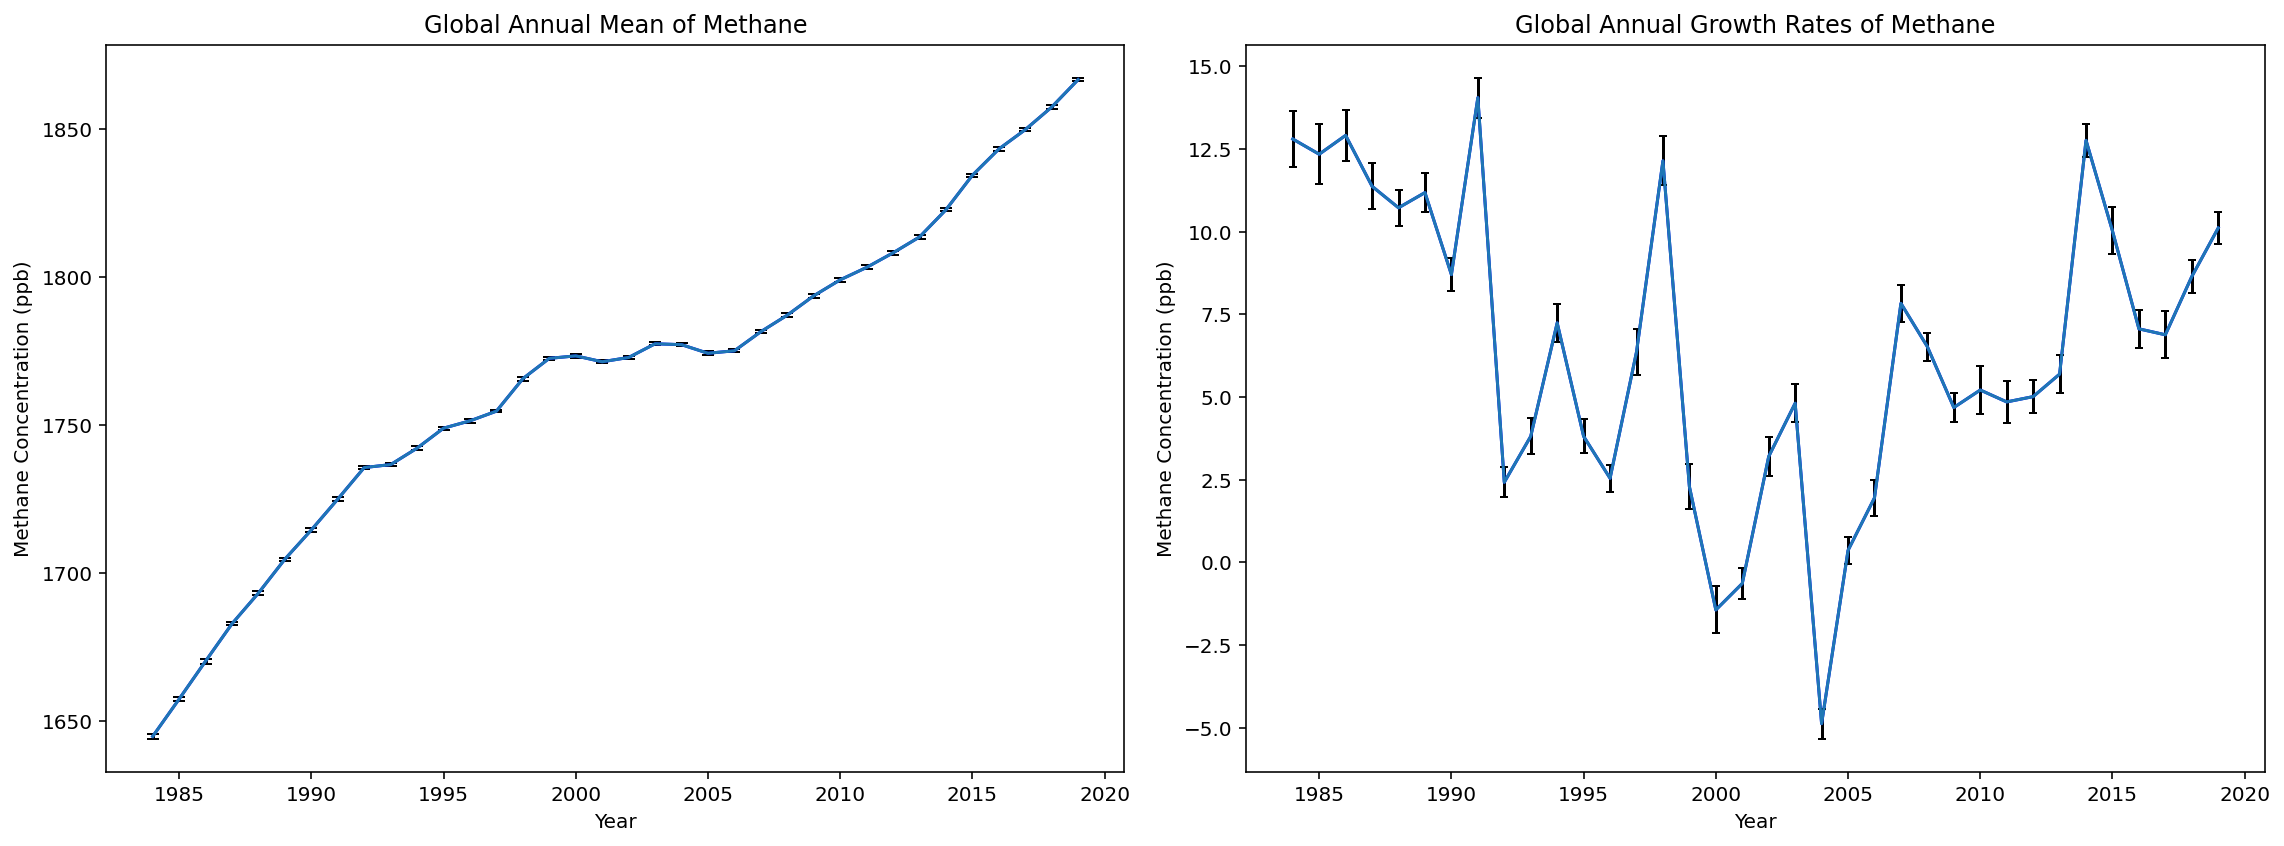

In [21]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

ch4_data.Mean_CH4.plot(ax=axes[0], color = 'blue', yerr = ch4_data.Unc_CH4, xlabel = 'Years', ylabel ='Methane Concentration (ppb)',
                       title = 'Global Annual Mean of Methane')
ch4_data.Mean_CH4.plot(ax=axes[0], yerr = ch4_data.Unc_CH4, capsize =3, capthick = 1, ecolor = 'black')

ch4_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Methane Concentration (ppb)',
                       title = 'Global Annual Growth Rates of Methane')
ch4_data.Growth_Rates.plot(ax=axes[1], yerr = ch4_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean and growth rates of Nitrous Oxide, 2001 - 2019

I read the two text files of N2O into pandas and reformat them with an index 'Year'. Then, I join the annual mean and growth rates datasets together.

In [8]:
# Load the annual mean and growth rates of N2O
n2o_an = pd.read_csv('n2o_annmean_gl.txt', sep="\s+",comment = '#', header=None,
                    names = ['Year', 'Mean_N2O', 'Unc_N2O'])
n2o_an = n2o_an.set_index('Year')
n2o_gr = pd.read_csv('n2o_gr_gl.txt',  comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
n2o_gr = n2o_gr.set_index('Year')

# Merge two datasets
n2o_data = n2o_an.join(n2o_gr, how ='right')
n2o_data.head()

,Mean_N2O,Unc_N2O,Growth_Rates,Unc_GR
Year,,,,
2001,316.36,0.14,0.71,0.12
2002,316.94,0.14,0.50,0.15
2003,317.62,0.13,0.80,0.15
2004,318.25,0.11,0.53,0.16
2005,318.91,0.12,0.87,0.15


#### Plot the annual mean and growth rates of Nitrous Oxide, 2001 - 2019

I draw the two line graphs for N2O dataset and add the error bar into the plots.

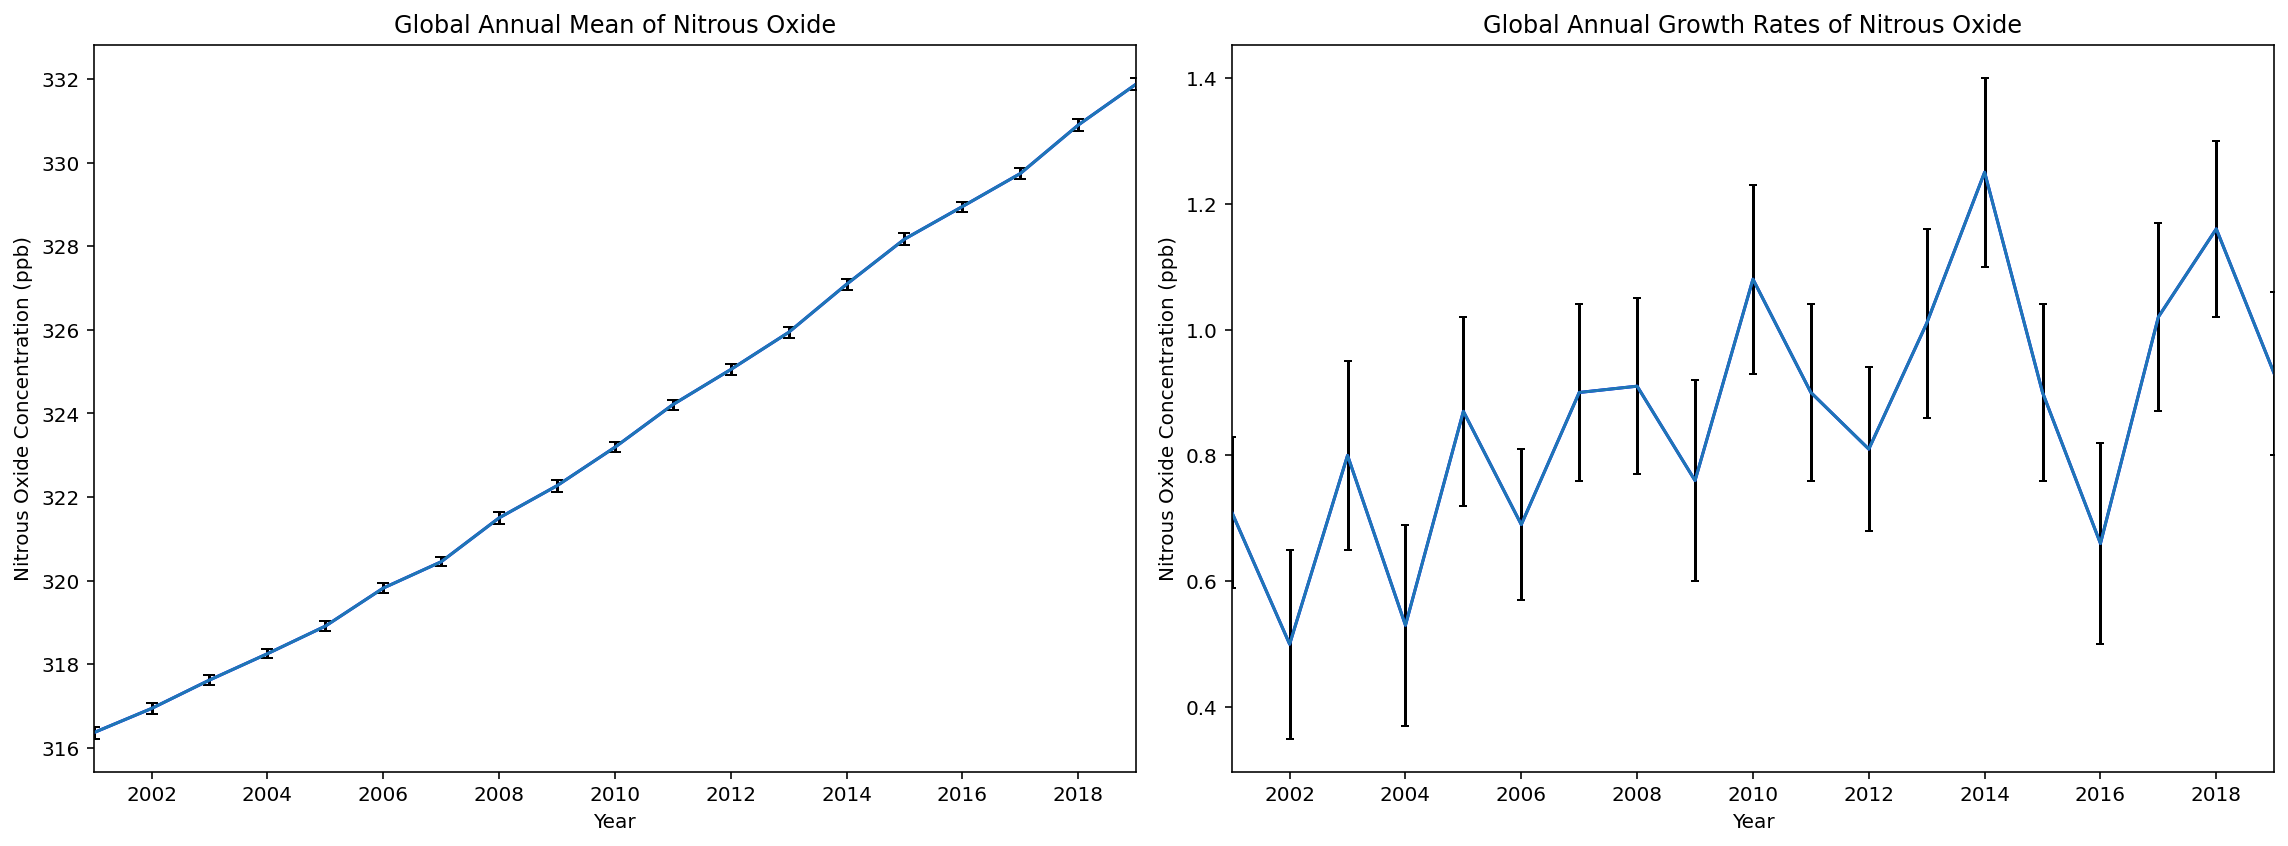

In [9]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

n2o_data.Mean_N2O.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Nitrous Oxide Concentration (ppb)', xlim=(2001,2019),
                       title = 'Global Annual Mean of Nitrous Oxide')
n2o_data.Mean_N2O.plot(ax=axes[0], yerr = n2o_data.Unc_N2O, capsize =3, capthick = 1, ecolor = 'black')

n2o_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Nitrous Oxide Concentration (ppb)', xlim=(2001,2019),
                       title = 'Global Annual Growth Rates of Nitrous Oxide')
n2o_data.Growth_Rates.plot(ax=axes[1], yerr = n2o_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean and growth rates of Sulfur Hexafluoride, 1998 - 2019

I read the two text files of SF6 into pandas and reformat them with an index 'Year'. Then, I join the annual mean and growth rates datasets together.

In [10]:
# Load the annual mean and growth rates of SF6
sf6_an = pd.read_csv('sf6_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_SF6', 'Unc_SF6'])
sf6_an = sf6_an.set_index('Year')
sf6_gr = pd.read_csv('sf6_gr_gl.txt', sep="\s+",  comment = '#', header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
sf6_gr = sf6_gr.set_index('Year')

# Merge two datasets
sf6_data = sf6_an.join(sf6_gr, how ='right')
sf6_data.head()

,Mean_SF6,Unc_SF6,Growth_Rates,Unc_GR
Year,,,,
1998,4.21,0.003,0.20,0.004
1999,4.38,0.004,0.17,0.004
2000,4.58,0.003,0.20,0.005
2001,4.78,0.004,0.19,0.004
2002,4.98,0.002,0.22,0.004


#### Plot the annual mean and growth rates of Sulfur Hexafluoride, 1998 - 2019

I draw the two line graphs for SF6 dataset and add the error bar into the plots.

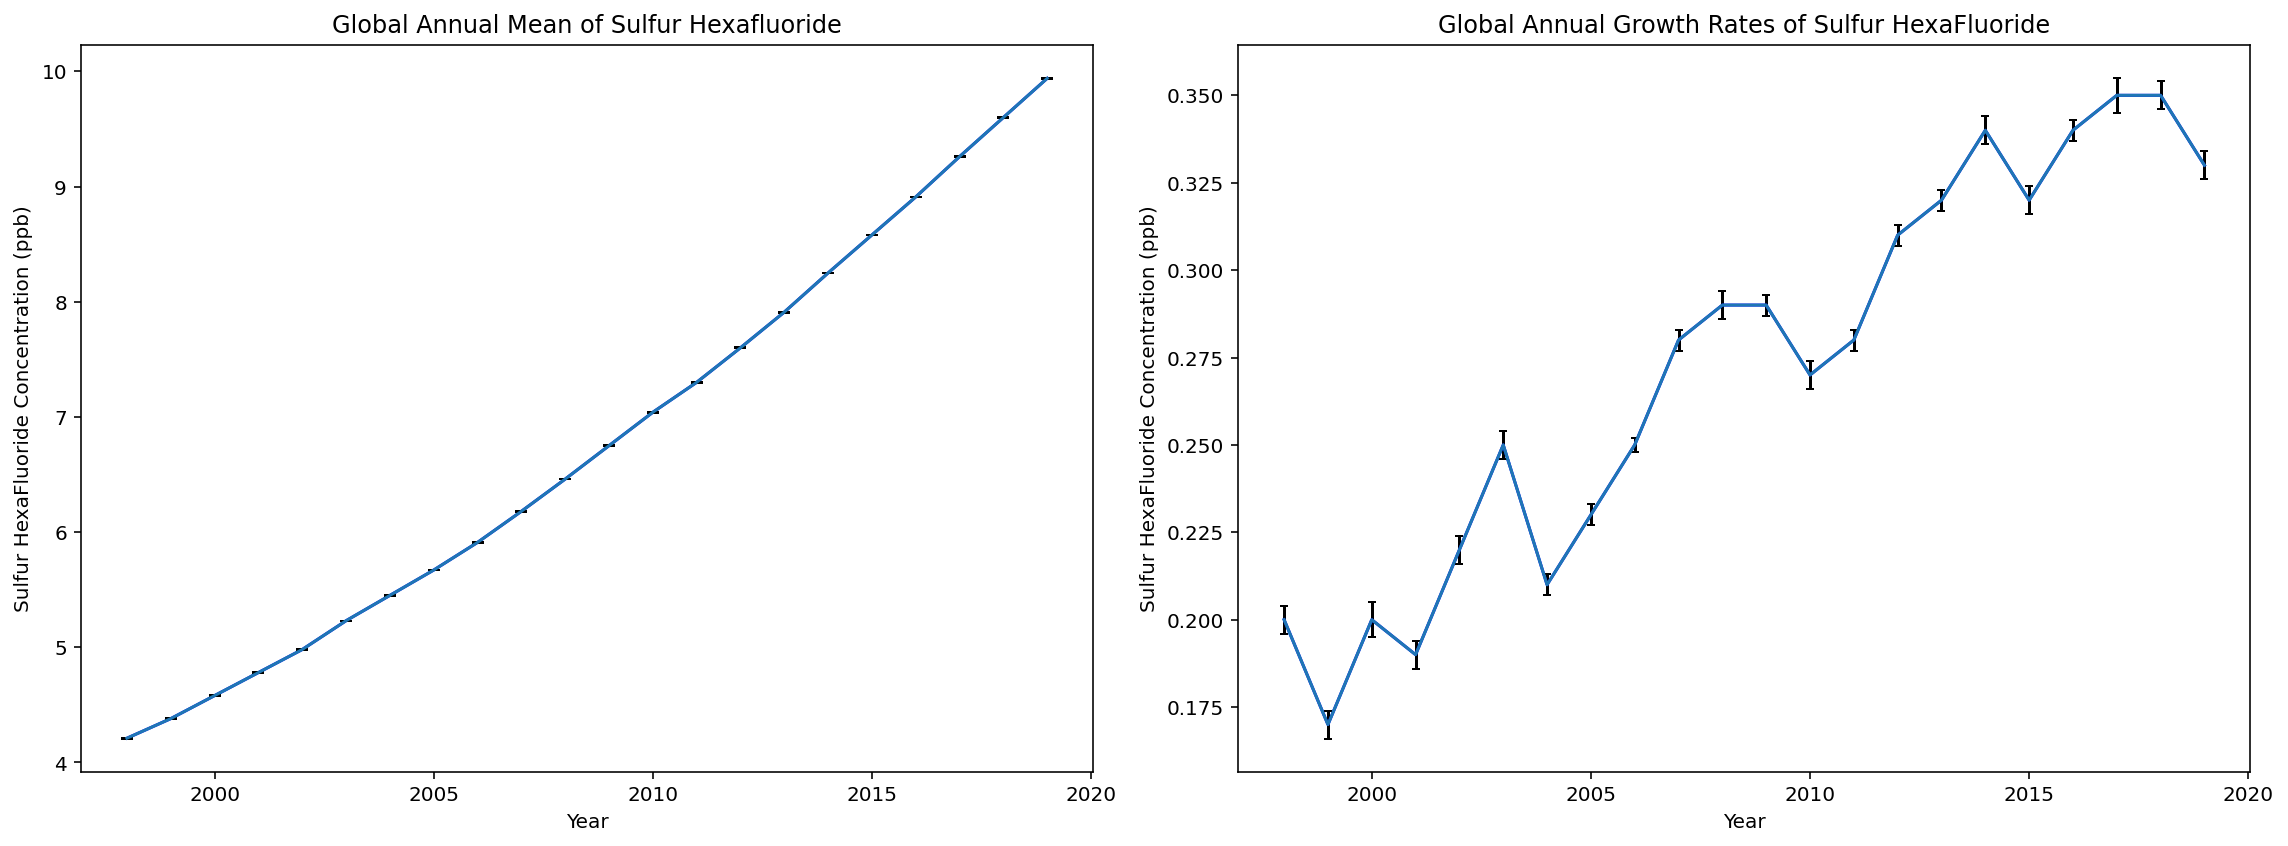

In [11]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

sf6_data.Mean_SF6.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Sulfur HexaFluoride Concentration (ppb)',
                       title = 'Global Annual Mean of Sulfur Hexafluoride')
sf6_data.Mean_SF6.plot(ax=axes[0], yerr = sf6_data.Unc_SF6, capsize =3, capthick = 1, ecolor = 'black')

sf6_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Sulfur HexaFluoride Concentration (ppb)',
                       title = 'Global Annual Growth Rates of Sulfur HexaFluoride')
sf6_data.Growth_Rates.plot(ax=axes[1], yerr = sf6_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Load, reformat, and merge the annual mean of Carbon Dioxide, 1980-2019 and the growth rates of Carbon Dioxide, 1959 - 2019

I read the two text files of CO2 into pandas and reformat them with an index 'Year'. Then, I join the annual mean and growth rates datasets together.

In [12]:
# Load the annual mean and growth rates of CO2
co2_an = pd.read_csv('co2_annmean_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Mean_CO2', 'Unc_CO2'])
co2_an = co2_an.set_index('Year')
co2_gr = pd.read_csv('co2_gr_gl.txt', comment = '#', sep="\s+", header=None,
                    names = ['Year', 'Growth_Rates', 'Unc_GR'])
co2_gr = co2_gr.set_index('Year')

# Merge two datasets
co2_data = co2_an.join(co2_gr, how ='right')
co2_data

,Mean_CO2,Unc_CO2,Growth_Rates,Unc_GR
Year,,,,
1959,NaN,NaN,0.96,0.31
1960,NaN,NaN,0.71,0.27
1961,NaN,NaN,0.78,0.27
1962,NaN,NaN,0.56,0.27
1963,NaN,NaN,0.57,0.28
...,...,...,...,...
2015,399.42,0.1,2.96,0.07
2016,402.85,0.1,2.87,0.08
2017,405.00,0.1,2.14,0.09


#### Plot the annual mean of Carbon Dioxide, 1980 - 2019 and the growth rates of Carbon Dioxide, 1959 - 2019

I draw the two line graphs for CO2 dataset and add the error bar into the plots.

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


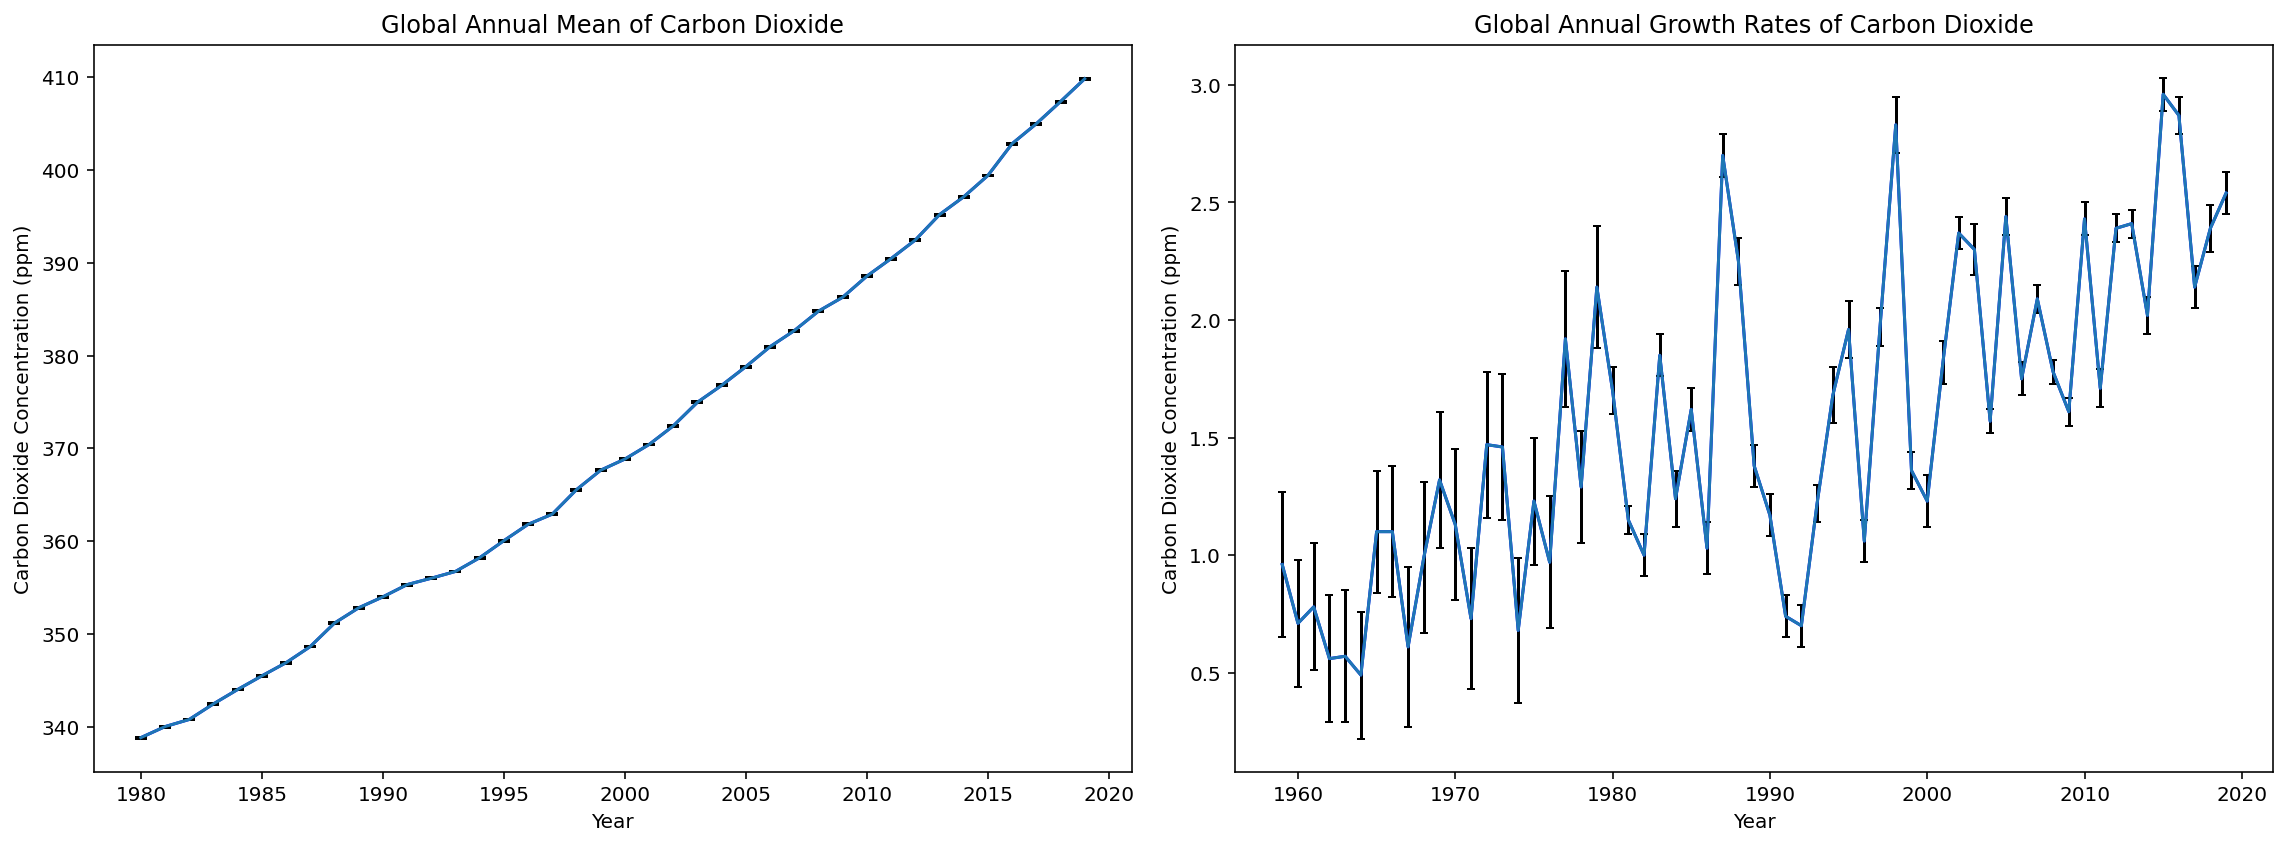

In [13]:
fig, axes = plt.subplots(ncols = 2, figsize= (16,6))

co2_data.Mean_CO2.plot(ax=axes[0], color = 'blue', xlabel = 'Years', ylabel ='Carbon Dioxide Concentration (ppm)',
                       title = 'Global Annual Mean of Carbon Dioxide')
co2_data.Mean_CO2.plot(ax=axes[0], yerr = co2_data.Unc_CO2, capsize =3, capthick = 1, ecolor = 'black')

co2_data.Growth_Rates.plot(ax=axes[1], color = 'blue', xlabel = 'Years', ylabel ='Carbon Dioxide Concentration (ppm)',
                       title = 'Global Annual Growth Rates of Carbon Dioxide')
co2_data.Growth_Rates.plot(ax=axes[1], yerr = co2_data.Unc_GR, capsize = 2, capthick = 1, ecolor = 'black')

plt.tight_layout()
plt.show()

#### Interpretation from the four figures:
- The overall trend in a global annual mean of four GHG is increasing with time. The CO2 concentration increased the most, 71.05 ppm in the 1980-2019 period, while the CH4 concentration also rose 221.9 ppb in the 1984-2019 period.
- The growth rates of all four GHG varied significantly with time. In comparison with other GHG growth rates, the SF6 growth rate increased rapidly from 1998 to 2019. The CO2 and N2O growth rates increased slightly in their measured period. 
- The growth rate of CH4 decreased slightly from 1984 to 2019. In the years 2000, 2001, and 2004, the growth rate of CH4 was negative. Therefore, the CH4 concentration in the atmosphere in these years dropped.

## Part 3: The Global Sea Surface Temperature, 1960 - 2019 

#### Load the Sea Surface Temperature Data, 1960 - 2019

I paste the url from the esrl.noaa.gov website. Then, I read the netCDF file into xarray and use slice to choose the data in the period 1960-2020.


In [9]:
# Load the SST data and use slice to select the period from 1960 to now

url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1960', None)).load()
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 731)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-11-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes:
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    geospatial_lon_min:              -1.0
    geospatial_lon_max:              359.0
    geospatial_laty_max:             89.0
    geospatial_laty_min:             -89.0
    geospatial_lat_max:              89.0
    geospatial_lat_min:              -89.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    cdm_data_type:                   Grid
    project:                         NOAA Extended Reconstructed Sea Surface ...
    original_publisher_url:          http://www.ncdc.noaa.gov
    References:                      https://www.ncdc.noaa.gov/data-access/ma...
    source:                          In situ data: ICOADS R3.0 before 2015, N...
    title:                           NOAA ERSSTv5 (in situ only)
    history:                         created 07/2017 by PSD data using NCEI's...
    institution:                     This version written at NOAA/ESRL PSD: o...
    citation:                        Huang et al, 2017: Extended Reconstructe...
    platform:                        Ship and Buoy SSTs from ICOADS R3.0 and ...
    standard_name_vocabulary:        CF Standard Name Table (v40, 25 January ...
    processing_level:                NOAA Level 4
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   :metadata_link = https://doi.org/10.7289...
    creator_name:                    Boyin Huang (original)
    date_created:                    2017-06-30T12:18:00Z (original)
    product_version:                 Version 5
    creator_url_original:            https://www.ncei.noaa.gov
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2020-12-07
    DODS_EXTRA.Unlimited_Dimension:  time

#### Calculate the Sea Surface Temperature Anomalies

For calculating the SST anomalies, I use groupby to group the sst data in time dimension by month, find the anomaly by subtract all the dataset by the mean of groupby object, and use slice to take out the mean of sst anomalies for the year 1960 and 2019. 

Next, I calculate the difference in the mean SST anomalies between the 1960-2019 period. Finally, I compute the difference in the SST anomalies in summer time (July) and winter time (January) in the same period.

In [10]:
# Calculate the SST anomaly for all dataset 
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')

# Calculate the mean SST anomaly in 1960
ds1 = ds_anom.loc[dict(time= slice('1960-01-01','1960-12-01'))]
ds1_m = ds1.sst.mean(dim='time')

# Calculate the mean SST anomaly in 2019
ds2 = ds_anom.loc[dict(time= slice('2019-01-01','2019-12-01'))]
ds2_m = ds2.sst.mean(dim='time')

# Calculate the difference in the mean SST anomalies between 1960 and 2019
ds12_diff = ds2_m - ds1_m

# Calculate the difference in the SST anomalies in summer and winter time between 1960 and 2019
summer_diff = (ds_anom.sel(time='2019-07-01') - ds_anom.sel(time='1960-07-01'))
winter_diff = (ds_anom.sel(time='2019-01-01') - ds_anom.sel(time='1960-01-01'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


#### Plot the Global Sea Surface Temperature Anomalies

I use subplots function in matplotlib to plot three differences in SST anomalies calculated above. Also, I set the similar scale bar in all three graphs for comparison.  

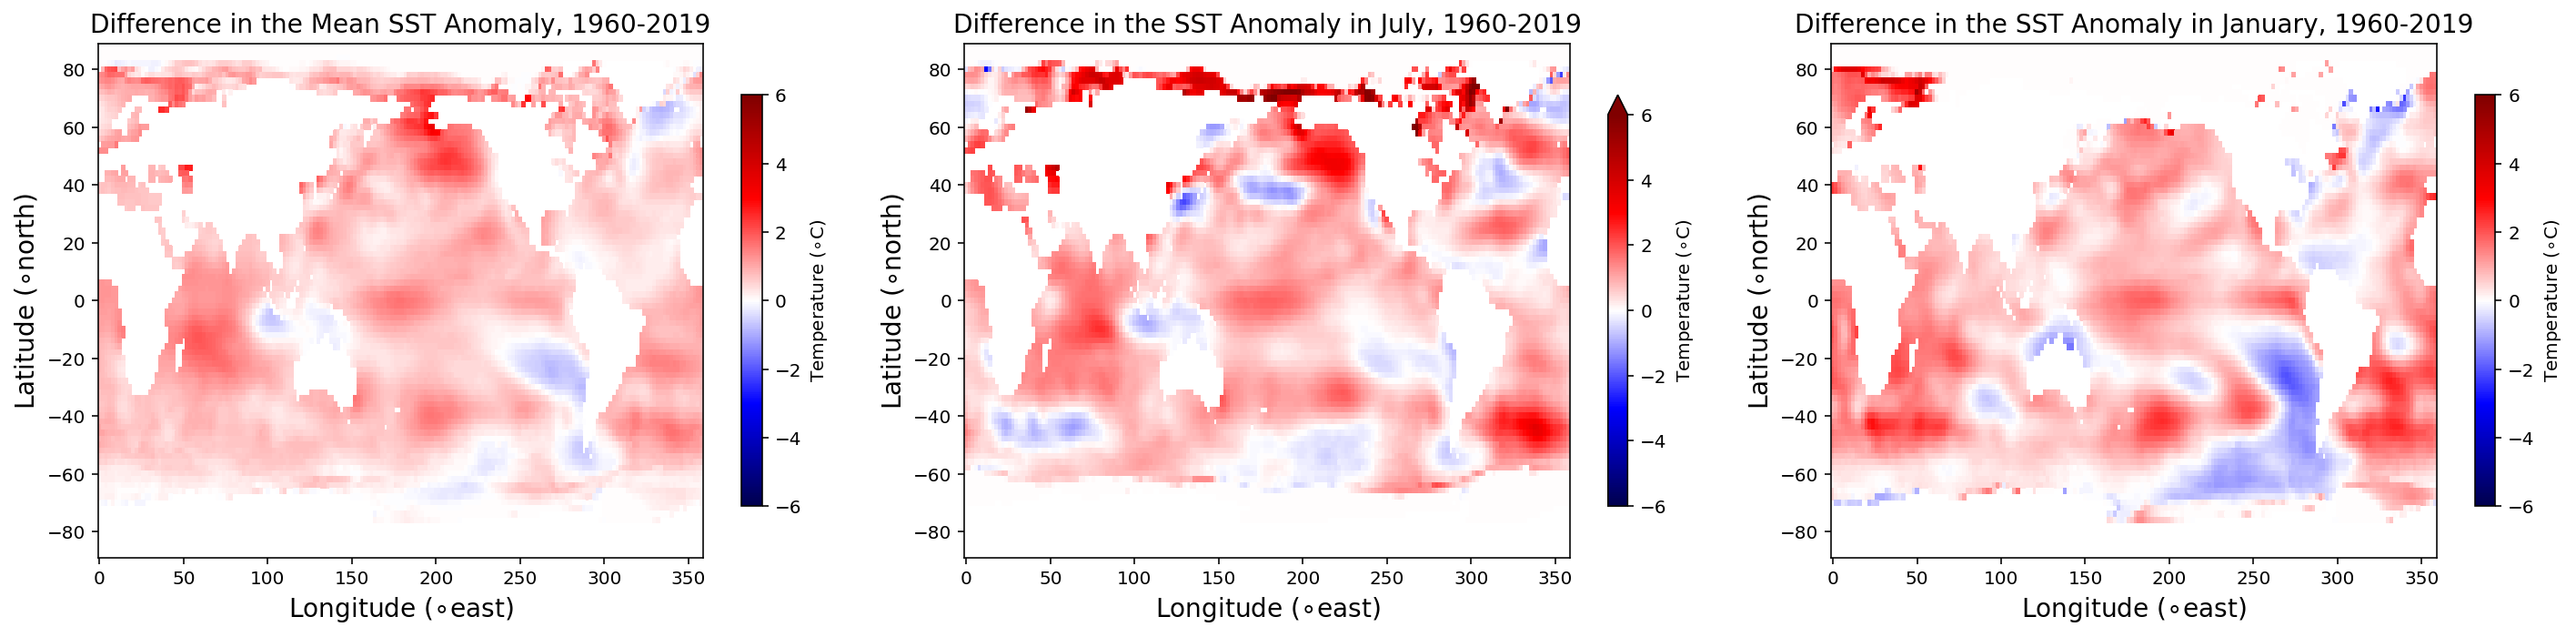

In [35]:
# Plot the SST Anomaly in the period 1960-2019

fig, axes = plt.subplots(ncols = 3, figsize= (20,5))

ds12_diff.plot(ax = axes[0], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic', vmin = -6, vmax = 6)
axes[0].set_title('Difference in the Mean SST Anomaly, 1960-2019', size = 14)
axes[0].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[0].set_ylabel('Latitude ($\circ$north)', size = 14)


summer_diff.sst.plot(ax = axes[1], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic', vmin = -6, vmax =6)
axes[1].set_title('Difference in the SST Anomaly in July, 1960-2019', size = 14)
axes[1].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[1].set_ylabel('Latitude ($\circ$north)', size = 14)

winter_diff.sst.plot(ax = axes[2], cbar_kwargs = {'shrink': 0.8, 'label':'Temperature ($\circ$C)'}, cmap = 'seismic',  vmin = -6, vmax =6)
axes[2].set_title('Difference in the SST Anomaly in January, 1960-2019', size = 14)
axes[2].set_xlabel('Longitude ($\circ$east)', size = 14)
axes[2].set_ylabel('Latitude ($\circ$north)', size = 14)

plt.tight_layout()
plt.show()

#### Interpretation from the graphs: 
- In general, the mean SST anomaly in 2019 is mostly higher than the mean SST anomaly in 1960, especially in the northern Pacific Ocean with the difference up to about four centigrades and in the Arctic Ocean(dark red regions).
- Negative mean SST anomalies occur in the southwesternmost region of the Pacific Ocean, the area in between Indonesia and Australia, and the northernmost area of the Atlantic Ocean. 
- In July (summer in the Northern Hemisphere), the difference in SST anomaly is larger than the difference in the mean SST anomaly in the same period. This pattern is illustrated clearly in the region between 60N and 80N latitude. This region has the highest SST anomaly (eight centigrades) in all three graphs. The negative anomalies appeared locally in the Pacific Ocean and the southernmost area of Africa.
- In January (winter in the Northern Hemisphere), the positive SST anomaly still dominates the negative SST anomaly. However, in comparison with the first graph, the negative SST anomaly expands in the southwesternmost region of the Pacific Ocean and the region in between Indonesia and Australia. The negative anomaly in the northern Atlantic also extends southwards up to the east coast of America and the Central Caribbean.  

## Part 4: The Sea Ice Extent of Northern and Southern Hemispheres, 1979 - 2020

I download the Sea Ice Extent datasets for Northern and Southern Hemispheres in February and August, 1979- - 2020 from the ncdc.noaa.gov website and upload them to the local repository (the data is also available on my github). 

#### Load the Sea Ice Extent Data, 1979 - 2020 

I read the two csv data files of Sea Ice in Northern Hemisphere into pandas and reformat them with an index 'Year'. Then I join two dataset together.

In [22]:
# Load the data of Sea Ice in Northern Hemisphere in February
sinf = pd.read_csv('sea_ice_northern_Feb.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_NH_Feb', 'Anomaly_NH_Feb'])
df_sinf = pd.DataFrame(sinf)
df_sinf = df_sinf.set_index('Year')

# Load the data of Sea Ice in Northern Hemisphere in August
sina = pd.read_csv('sea_ice_northern_Aug.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_NH_Aug', 'Anomaly_NH_Aug'])
df_sina = pd.DataFrame(sina)
df_sina = df_sina.set_index('Year')

# Merge two datasets of Sea Ice in Northern Hemisphere
df_nh = df_sinf.join(df_sina, how = 'right')
df_nh.head()

,Extent_NH_Feb,Anomaly_NH_Feb,Extent_NH_Aug,Anomaly_NH_Aug
Year,,,,
1979,16.18,0.88,8.04,0.84
1980,15.96,0.66,7.98,0.78
1981,15.60,0.30,7.84,0.64
1982,15.97,0.67,8.14,0.94
1983,16.01,0.71,8.19,0.99


I read the two csv data files of Sea Ice in Southern Hemisphere into pandas and reformat them with an index 'Year'. Then I join two dataset together.

In [23]:
# Load the data of Sea Ice Southern Hemisphere in February
sisf = pd.read_csv('sea_ice_southern_Feb.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_SH_Feb', 'Anomaly_SH_Feb'])
df_sisf = pd.DataFrame(sisf)
df_sisf = df_sisf.set_index('Year')

# Load the data of Sea Ice Southern Hemisphere in August
sisa = pd.read_csv('sea_ice_southern_Aug.csv', skiprows = [0,1,2,3],
                     names = ['Year','Extent_SH_Aug', 'Anomaly_SH_Aug'])
df_sisa = pd.DataFrame(sisa)
df_sisa = df_sisa.set_index('Year')

# Merge two datasets of Sea Ice in Southern Hemisphere
df_sh = df_sisf.join(df_sisa, how ='right')
df_sh.head()

,Extent_SH_Feb,Anomaly_SH_Feb,Extent_SH_Aug,Anomaly_SH_Aug
Year,,,,
1979,3.14,0.07,17.70,-0.02
1980,2.82,-0.25,17.81,0.09
1981,2.87,-0.20,17.74,0.02
1982,3.13,0.06,17.79,0.07
1983,3.07,0.00,17.25,-0.47


I join the Northern and Southern Hemisphere sub-dataset into one single dataset, called df_si (DataFrame_SeaIce). 

In [24]:
# Merge two datasets of Sea Ice in both Hemispheres
df_si = pd.concat([df_nh, df_sh], axis =1)
df_si.head()

,Extent_NH_Feb,Anomaly_NH_Feb,Extent_NH_Aug,Anomaly_NH_Aug,Extent_SH_Feb,Anomaly_SH_Feb,Extent_SH_Aug,Anomaly_SH_Aug
Year,,,,,,,,
1979,16.18,0.88,8.04,0.84,3.14,0.07,17.70,-0.02
1980,15.96,0.66,7.98,0.78,2.82,-0.25,17.81,0.09
1981,15.60,0.30,7.84,0.64,2.87,-0.20,17.74,0.02
1982,15.97,0.67,8.14,0.94,3.13,0.06,17.79,0.07
1983,16.01,0.71,8.19,0.99,3.07,0.00,17.25,-0.47


#### Plot the Sea Ice Extent Data for the Northern and Southern Hemispheres, 1979 - 2020

I use subplots function in matplotlib to plot the Sea Ice Extent (million km2) with time. The color of Northern Hemisphere plots is blue, while the color of Southern Hemisphere plots is orange. Also, I plot the same month in a row for comparison between the two hemispheres.  

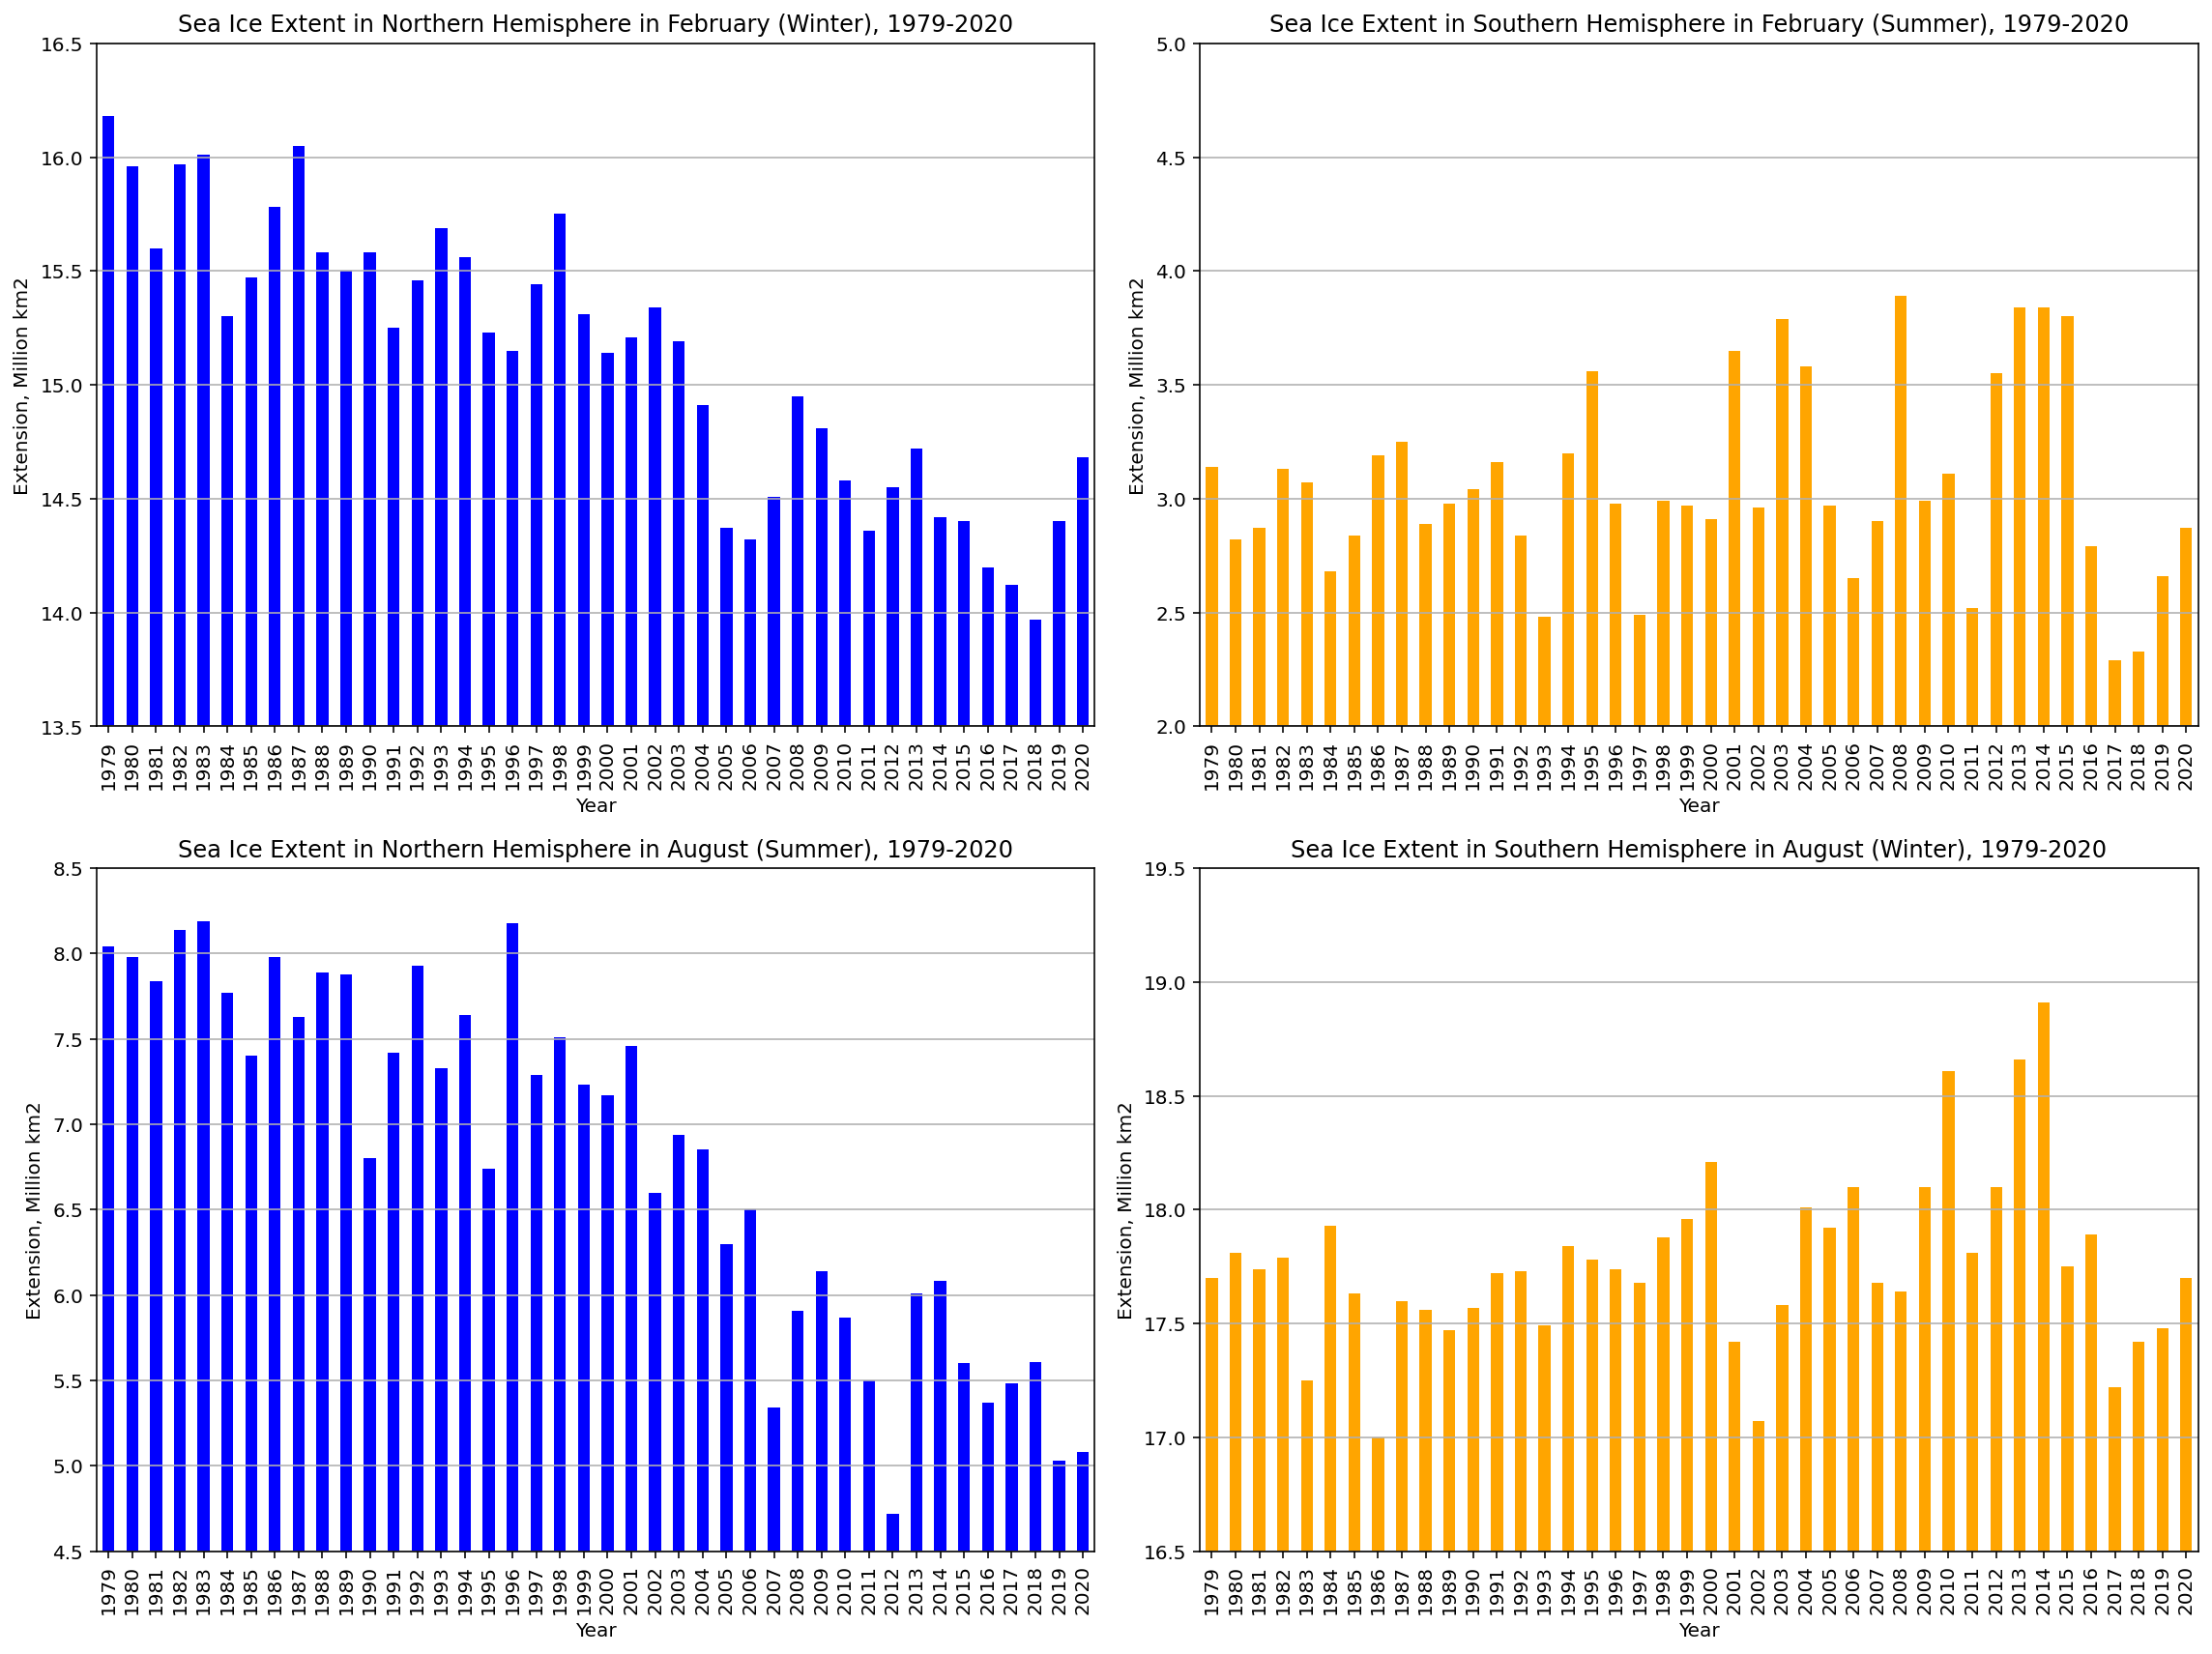

In [34]:
# Plot the Sea Ice Extent in the period 1979-2020
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize= (16,12))

df_si.Extent_NH_Feb.plot(ax=axes[0,0], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(13.5,16.5),
                    color = 'blue', title='Sea Ice Extent in Northern Hemisphere in February (Winter), 1979-2020').grid(axis='y')

df_si.Extent_NH_Aug.plot(ax=axes[1,0], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(4.5,8.5),
                    color = 'blue', title='Sea Ice Extent in Northern Hemisphere in August (Summer), 1979-2020').grid(axis='y')

df_si.Extent_SH_Feb.plot(ax=axes[0,1], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(2.0,5.0),
                    color = 'orange', title='Sea Ice Extent in Southern Hemisphere in February (Summer), 1979-2020').grid(axis='y')

df_si.Extent_SH_Aug.plot(ax=axes[1,1], kind = 'bar', xlabel = 'Year', ylabel = 'Extension, Million km2', ylim =(16.5,19.5),
                    color = 'orange', title='Sea Ice Extent in Southern Hemisphere in August (Winter), 1979-2020').grid(axis='y')

plt.tight_layout()
plt.show()

#### Interpretation from the graph:
- In the Northern Hemisphere, the sea ice extent decreases rapidly (about 2.5 million km2) in both summer and winter from 1979 to 2020. The difference in sea ice extent between summer and winter time also increases about 1 million km2 in the 1979-2020 period. 
- In the Southern Hemisphere, the sea ice extent fluctuates in both summer and winter in the 1979-2020 period. However, the sea ice extent has almost the same value for both 1979 and 2020.
- In the summertime, the sea ice extent in Northern Hemisphere is larger than that in Southern Hemisphere (~ 2.5 million km2). While, in the wintertime, the sea ice extent in Southern Hemisphere is larger than that in Northern Hemisphere (~ 3.0 million km2).

## Conclusion

The increase in global greenhouse gas concentration in the atmosphere is positively correlated with the sea surface temperature anomaly and negatively correlated with sea ice extent in the Northern Hemisphere.

The increase in global greenhouse gas concentration seems to be uncorrelated with the sea ice extent in the Southern Hemisphere.

The increase in global greenhouse gas concentration gives rise to positive climate forcing, especially in the Northern Hemisphere.

Further discussion:
 We could add more other climate change indicators to make the comparison and enhance the conclusion. It would be interesting to consider the temporary change in greenhouse gas concentration in 2020 and other climate change indicators because of the decrease in global greenhouse gas emissions due to COVID-19.